In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub

print("Tensorflow version: ", tf.__version__)
print("Tensorflow hub version: ", hub.__version__)

Tensorflow version:  2.15.0
Tensorflow hub version:  0.15.0


## Setting the model

In [2]:
# Other models: https://tfhub.dev/s?module-type=image-feature-vector&tf-version=tf2
model_name = 'efficientnetv2-xl-21k' # @param ['efficientnetv2-s', 'efficientnetv2-m', 'efficientnetv2-l', 'efficientnetv2-s-21k', 'efficientnetv2-m-21k', 'efficientnetv2-l-21k', 'efficientnetv2-xl-21k', 'efficientnetv2-b0-21k', 'efficientnetv2-b1-21k', 'efficientnetv2-b2-21k', 'efficientnetv2-b3-21k', 'efficientnetv2-s-21k-ft1k', 'efficientnetv2-m-21k-ft1k', 'efficientnetv2-l-21k-ft1k', 'efficientnetv2-xl-21k-ft1k', 'efficientnetv2-b0-21k-ft1k', 'efficientnetv2-b1-21k-ft1k', 'efficientnetv2-b2-21k-ft1k', 'efficientnetv2-b3-21k-ft1k', 'efficientnetv2-b0', 'efficientnetv2-b1', 'efficientnetv2-b2', 'efficientnetv2-b3', 'efficientnet_b0', 'efficientnet_b1', 'efficientnet_b2', 'efficientnet_b3', 'efficientnet_b4', 'efficientnet_b5', 'efficientnet_b6', 'efficientnet_b7', 'bit_s-r50x1', 'inception_v3', 'inception_resnet_v2', 'resnet_v1_50', 'resnet_v1_101', 'resnet_v1_152', 'resnet_v2_50', 'resnet_v2_101', 'resnet_v2_152', 'nasnet_large', 'nasnet_mobile', 'pnasnet_large', 'mobilenet_v2_100_224', 'mobilenet_v2_130_224', 'mobilenet_v2_140_224', 'mobilenet_v3_small_100_224', 'mobilenet_v3_small_075_224', 'mobilenet_v3_large_100_224', 'mobilenet_v3_large_075_224']

In [3]:
models_path = {
  "efficientnetv2-s": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_s/feature_vector/2",
  "efficientnetv2-m": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_m/feature_vector/2",
  "efficientnetv2-l": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_l/feature_vector/2",
  "efficientnetv2-s-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_s/feature_vector/2",
  "efficientnetv2-m-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_m/feature_vector/2",
  "efficientnetv2-l-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_l/feature_vector/2",
  "efficientnetv2-xl-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_xl/feature_vector/2",
  "efficientnetv2-b0-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b0/feature_vector/2",
  "efficientnetv2-b1-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b1/feature_vector/2",
  "efficientnetv2-b2-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b2/feature_vector/2",
  "efficientnetv2-b3-21k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b3/feature_vector/2",
  "efficientnetv2-s-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_s/feature_vector/2",
  "efficientnetv2-m-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_m/feature_vector/2",
  "efficientnetv2-l-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_l/feature_vector/2",
  "efficientnetv2-xl-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_xl/feature_vector/2",
  "efficientnetv2-b0-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b0/feature_vector/2",
  "efficientnetv2-b1-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b1/feature_vector/2",
  "efficientnetv2-b2-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b2/feature_vector/2",
  "efficientnetv2-b3-21k-ft1k": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b3/feature_vector/2",
  "efficientnetv2-b0": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2",
  "efficientnetv2-b1": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b1/feature_vector/2",
  "efficientnetv2-b2": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b2/feature_vector/2",
  "efficientnetv2-b3": "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b3/feature_vector/2",
  "efficientnet_b0": "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1",
  "efficientnet_b1": "https://tfhub.dev/tensorflow/efficientnet/b1/feature-vector/1",
  "efficientnet_b2": "https://tfhub.dev/tensorflow/efficientnet/b2/feature-vector/1",
  "efficientnet_b3": "https://tfhub.dev/tensorflow/efficientnet/b3/feature-vector/1",
  "efficientnet_b4": "https://tfhub.dev/tensorflow/efficientnet/b4/feature-vector/1",
  "efficientnet_b5": "https://tfhub.dev/tensorflow/efficientnet/b5/feature-vector/1",
  "efficientnet_b6": "https://tfhub.dev/tensorflow/efficientnet/b6/feature-vector/1",
  "efficientnet_b7": "https://tfhub.dev/tensorflow/efficientnet/b7/feature-vector/1",
  "bit_s-r50x1": "https://tfhub.dev/google/bit/s-r50x1/1",
  "inception_v3": "https://tfhub.dev/google/imagenet/inception_v3/feature-vector/4",
  "inception_resnet_v2": "https://tfhub.dev/google/imagenet/inception_resnet_v2/feature-vector/4",
  "resnet_v1_50": "https://tfhub.dev/google/imagenet/resnet_v1_50/feature-vector/4",
  "resnet_v1_101": "https://tfhub.dev/google/imagenet/resnet_v1_101/feature-vector/4",
  "resnet_v1_152": "https://tfhub.dev/google/imagenet/resnet_v1_152/feature-vector/4",
  "resnet_v2_50": "https://tfhub.dev/google/imagenet/resnet_v2_50/feature-vector/4",
  "resnet_v2_101": "https://tfhub.dev/google/imagenet/resnet_v2_101/feature-vector/4",
  "resnet_v2_152": "https://tfhub.dev/google/imagenet/resnet_v2_152/feature-vector/4",
  "nasnet_large": "https://tfhub.dev/google/imagenet/nasnet_large/feature_vector/4",
  "nasnet_mobile": "https://tfhub.dev/google/imagenet/nasnet_mobile/feature_vector/4",
  "pnasnet_large": "https://tfhub.dev/google/imagenet/pnasnet_large/feature_vector/4",
  "mobilenet_v2_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4",
  "mobilenet_v2_130_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/feature_vector/4",
  "mobilenet_v2_140_224": "https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/4",
  "mobilenet_v3_small_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/feature_vector/5",
  "mobilenet_v3_small_075_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_small_075_224/feature_vector/5",
  "mobilenet_v3_large_100_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/feature_vector/5",
  "mobilenet_v3_large_075_224": "https://tfhub.dev/google/imagenet/mobilenet_v3_large_075_224/feature_vector/5",
}

In [4]:
models_pixels = {
  "efficientnetv2-s": 384,
  "efficientnetv2-m": 480,
  "efficientnetv2-l": 480,
  "efficientnetv2-b0": 224,
  "efficientnetv2-b1": 240,
  "efficientnetv2-b2": 260,
  "efficientnetv2-b3": 300,
  "efficientnetv2-s-21k": 384,
  "efficientnetv2-m-21k": 480,
  "efficientnetv2-l-21k": 480,
  "efficientnetv2-xl-21k": 512,
  "efficientnetv2-b0-21k": 224,
  "efficientnetv2-b1-21k": 240,
  "efficientnetv2-b2-21k": 260,
  "efficientnetv2-b3-21k": 300,
  "efficientnetv2-s-21k-ft1k": 384,
  "efficientnetv2-m-21k-ft1k": 480,
  "efficientnetv2-l-21k-ft1k": 480,
  "efficientnetv2-xl-21k-ft1k": 512,
  "efficientnetv2-b0-21k-ft1k": 224,
  "efficientnetv2-b1-21k-ft1k": 240,
  "efficientnetv2-b2-21k-ft1k": 260,
  "efficientnetv2-b3-21k-ft1k": 300,
  "efficientnet_b0": 224,
  "efficientnet_b1": 240,
  "efficientnet_b2": 260,
  "efficientnet_b3": 300,
  "efficientnet_b4": 380,
  "efficientnet_b5": 456,
  "efficientnet_b6": 528,
  "efficientnet_b7": 600,
  "inception_v3": 299,
  "inception_resnet_v2": 299,
  "nasnet_large": 331,
  "pnasnet_large": 331,
}

In [5]:
model_path = models_path.get(model_name)
model_path

'https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_xl/feature_vector/2'

In [6]:
pixels = models_pixels.get(model_name)
pixels

512

In [7]:
image_size = (pixels, pixels)
image_size

(512, 512)

In [8]:
print('Model: ', model_name)
print('Model Path: ', model_path)
print('Image size: ', image_size)

Model:  efficientnetv2-xl-21k
Model Path:  https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_xl/feature_vector/2
Image size:  (512, 512)


## Dataset


*   Kaggle: https://www.kaggle.com/datasets/alxmamaev/flowers-recognition
*   TensorFlow: https://www.tensorflow.org/datasets/catalog/tf_flowers



In [9]:
# since the dataset is available in tensorflow, we don't need to download it
data_directory = tf.keras.utils.get_file('flower_photos',
                                         'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                                         untar = True) # This will unzip the dataset

228813984/228813984 [==============================] - 2s 0us/step


In [10]:
data_directory

'/root/.keras/datasets/flower_photos'

## Traning Dataset

In [11]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(data_directory,
                                                                    validation_split = .20,
                                                                    subset = 'training',
                                                                    label_mode = 'categorical',
                                                                    seed = 123,
                                                                    image_size = image_size,
                                                                    batch_size = 1)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [12]:
2936 / 3670  # checking the percentage of training data

0.8

In [13]:
train_dataset.class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [14]:
classes = train_dataset.class_names
classes

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [15]:
training_size = train_dataset.cardinality().numpy()
training_size

2936

In [16]:
BATCH_SIZE = 16

In [17]:
train_dataset = train_dataset.unbatch().batch(BATCH_SIZE) #previously batch size was 1 and now it is 16

In [18]:
train_dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

In [19]:
# Calculation of batch
2936 / 16   # Therefore, there are 183 batches and each batch there are 16 images

183.5

In [20]:
16 * 183 #batch size is 183.5 but we can't have fractional batch. Also when we consider batch size is 183 then 8 images are missing. So, we need some code in order to complete the batches

2928

In [21]:
# https://www.tensorflow.org/api_docs/python/tf/repeat
# https://stackoverflow.com/questions/53514495/what-does-batch-repeat-and-shuffle-do-with-tensorflow-dataset

# in order to complete the batches we need the following codes
train_dataset = train_dataset.repeat()

In [22]:
# Image augmentation: https://www.tensorflow.org/tutorials/images/data_augmentation
normalization_layer = tf.keras.layers.Rescaling(1. / 255)
pre_processing = tf.keras.Sequential([normalization_layer]) # before sending the data to the neural network this layer should be added to normalize the data
pre_processing.add(tf.keras.layers.RandomRotation(40))
pre_processing.add(tf.keras.layers.RandomTranslation(0, 0.2))
pre_processing.add(tf.keras.layers.RandomTranslation(0.2, 0))
pre_processing.add(tf.keras.layers.RandomZoom(0.2, 0.2))
pre_processing.add(tf.keras.layers.RandomFlip(mode = 'horizontal'))

In [23]:
train_dataset = train_dataset.map(lambda images, labels: (pre_processing(images), labels))

In [24]:
train_dataset

<_MapDataset element_spec=(TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

## Testing Dataset


In [25]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(data_directory,
                                                                 validation_split = .20,
                                                                 subset = 'validation',
                                                                 label_mode = 'categorical',
                                                                 seed = 123,
                                                                 image_size = image_size,
                                                                 batch_size = 1)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [26]:
test_size = test_dataset.cardinality().numpy()
test_size

734

In [27]:
test_dataset = test_dataset.unbatch().batch(BATCH_SIZE)
test_dataset = test_dataset.map(lambda images, labels: (pre_processing(images), labels))

In [28]:
test_dataset

<_MapDataset element_spec=(TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

## Building and training the neural network

In [29]:
image_size

(512, 512)

In [30]:
image_size + (3,)

(512, 512, 3)

In [31]:
model_path

'https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_xl/feature_vector/2'

In [32]:
len(classes)

5

In [33]:
# Dropout: https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf
model = tf.keras.Sequential([tf.keras.layers.InputLayer(input_shape=image_size + (3,)),
                             hub.KerasLayer(model_path, trainable=False),
                             tf.keras.layers.Dropout(rate=0.2),
                             tf.keras.layers.Dense(len(classes))])

In [34]:
(None, ) + image_size + (3,) # None indicates whatever number of images that will be send to the neural network. In our case, None specifies the Batch Size

(None, 512, 512, 3)

In [35]:
model.build((None, ) + image_size + (3,))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              207615832 
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 207622237 (792.02 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 207615832 (791.99 MB)
_________________________________________________________________


In [36]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])
# In the output layer, we didn't use activation='softmax'. This is why we need to pass from_logits=True

In [37]:
steps_per_epoch = training_size // BATCH_SIZE
validation_steps = test_size // BATCH_SIZE
print(steps_per_epoch, validation_steps)

183 45


In [38]:
hist = model.fit(train_dataset, epochs = 5, steps_per_epoch = steps_per_epoch,
                 validation_data = test_dataset, validation_steps = validation_steps).history

Epoch 1/5
183/183 [==============================] - 658s 3s/step - loss: 0.4404 - accuracy: 0.8470 - val_loss: 0.1912 - val_accuracy: 0.9361
Epoch 2/5
183/183 [==============================] - 607s 3s/step - loss: 0.1925 - accuracy: 0.9346 - val_loss: 0.1428 - val_accuracy: 0.9500
Epoch 3/5
183/183 [==============================] - 571s 3s/step - loss: 0.1503 - accuracy: 0.9459 - val_loss: 0.1580 - val_accuracy: 0.9514
Epoch 4/5
183/183 [==============================] - 566s 3s/step - loss: 0.1315 - accuracy: 0.9575 - val_loss: 0.1684 - val_accuracy: 0.9500
Epoch 5/5
183/183 [==============================] - 554s 3s/step - loss: 0.1188 - accuracy: 0.9562 - val_loss: 0.1391 - val_accuracy: 0.9569


In [39]:
hist

{'loss': [0.4404236078262329,
  0.192531555891037,
  0.15025532245635986,
  0.13148315250873566,
  0.11881066858768463],
 'accuracy': [0.8469945192337036,
  0.9345890283584595,
  0.9458904266357422,
  0.9575342535972595,
  0.9561643600463867],
 'val_loss': [0.19123272597789764,
  0.14278621971607208,
  0.15799780189990997,
  0.1683911681175232,
  0.139121875166893],
 'val_accuracy': [0.9361110925674438,
  0.949999988079071,
  0.9513888955116272,
  0.949999988079071,
  0.956944465637207]}

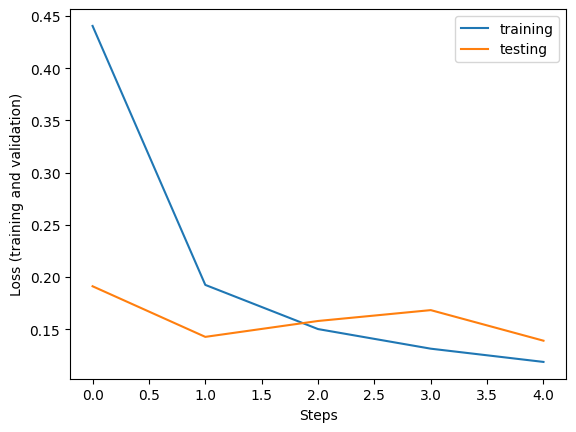

In [41]:
import matplotlib.pyplot as plt
plt.figure()
plt.ylabel('Loss (training and validation)')
plt.xlabel('Steps')
plt.plot(hist['loss'], label = 'training')
plt.plot(hist['val_loss'], label = 'testing')
plt.legend();

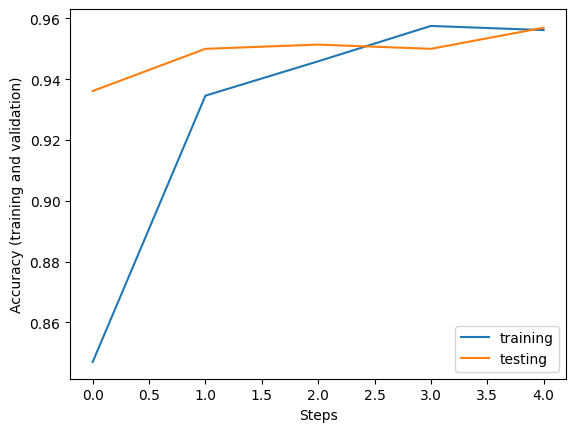

In [43]:
plt.figure()
plt.ylabel('Accuracy (training and validation)')
plt.xlabel('Steps')
plt.plot(hist['accuracy'], label = 'training')
plt.plot(hist['val_accuracy'], label = 'testing')
plt.legend();

## Testing with images

In [44]:
X, y = next(iter(test_dataset)) # X = pixels of the images in RGB format after normalization between 0 to 1
# y = labels

In [45]:
X

<tf.Tensor: shape=(16, 512, 512, 3), dtype=float32, numpy=
array([[[[3.92945021e-01, 4.93794382e-01, 2.41811633e-01],
         [3.89077455e-01, 4.85811830e-01, 2.55228758e-01],
         [3.81926119e-01, 4.75375772e-01, 2.67757416e-01],
         ...,
         [4.05464381e-01, 4.67340380e-01, 2.62329549e-01],
         [4.52110648e-01, 5.10273337e-01, 3.00696313e-01],
         [5.61481893e-01, 6.32225871e-01, 3.70470047e-01]],

        [[3.83837432e-01, 4.96015608e-01, 2.34614506e-01],
         [3.78536940e-01, 4.80563462e-01, 2.37641782e-01],
         [3.77879143e-01, 4.68568623e-01, 2.50190526e-01],
         ...,
         [3.59059751e-01, 4.09550875e-01, 2.48756468e-01],
         [3.86143804e-01, 4.32870388e-01, 2.65095800e-01],
         [5.04515409e-01, 5.64213514e-01, 3.33007097e-01]],

        [[4.11434084e-01, 5.31339169e-01, 2.77761757e-01],
         [3.89722317e-01, 5.00047743e-01, 2.53534526e-01],
         [3.75197083e-01, 4.71442878e-01, 2.45954350e-01],
         ...,
         [

In [46]:
X.shape

TensorShape([16, 512, 512, 3])

In [47]:
y

<tf.Tensor: shape=(16, 5), dtype=float32, numpy=
array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)>

In [48]:
image = X[0, :, :, :] # the first image in the batch
image

<tf.Tensor: shape=(512, 512, 3), dtype=float32, numpy=
array([[[0.39294502, 0.49379438, 0.24181163],
        [0.38907745, 0.48581183, 0.25522876],
        [0.38192612, 0.47537577, 0.26775742],
        ...,
        [0.40546438, 0.46734038, 0.26232955],
        [0.45211065, 0.51027334, 0.3006963 ],
        [0.5614819 , 0.6322259 , 0.37047005]],

       [[0.38383743, 0.4960156 , 0.2346145 ],
        [0.37853694, 0.48056346, 0.23764178],
        [0.37787914, 0.46856862, 0.25019053],
        ...,
        [0.35905975, 0.40955088, 0.24875647],
        [0.3861438 , 0.4328704 , 0.2650958 ],
        [0.5045154 , 0.5642135 , 0.3330071 ]],

       [[0.41143408, 0.53133917, 0.27776176],
        [0.38972232, 0.50004774, 0.25353453],
        [0.37519708, 0.47144288, 0.24595435],
        ...,
        [0.29907858, 0.33581242, 0.22324839],
        [0.30462348, 0.3387288 , 0.21957093],
        [0.4316551 , 0.47869748, 0.28681818]],

       ...,

       [[0.5823833 , 0.67179006, 0.65969175],
        [0.41

In [49]:
y_true = np.argmax(y[0])
y_true

3

In [50]:
classes[2]

'roses'

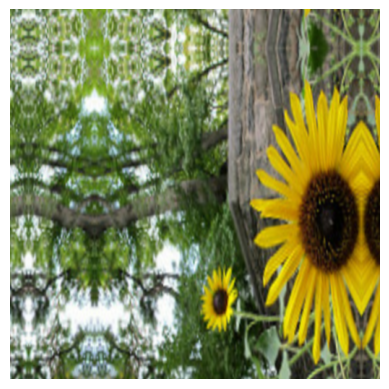

In [51]:
plt.imshow(image)
plt.axis('off');

In [52]:
image.shape

TensorShape([512, 512, 3])

In [53]:
image = np.expand_dims(image, axis = 0)
image.shape

(1, 512, 512, 3)

In [54]:
prediction = model.predict(image)
prediction

1/1 [==============================] - 7s 7s/step


array([[-3.7863626 , -0.79986364, -6.6936812 ,  6.1492167 , -6.5608273 ]],
      dtype=float32)

In [55]:
prediction = np.argmax(prediction)
prediction

3

In [56]:
model.save('/content/model')

In [57]:
loaded_model = tf.keras.models.load_model('/content/model')

In [58]:
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              207615832 
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 207622237 (792.02 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 207615832 (791.99 MB)
_________________________________________________________________


In [59]:
prediction = classes[np.argmax(loaded_model.predict(image))]
prediction

1/1 [==============================] - 6s 6s/step


'sunflowers'